#EDA BANCO


Este dataset contiene información de una campaña de marketing de un banco, donde el objetivo es predecir si un cliente contratará un producto financiero (variable y). Incluye tanto variables numéricas (edad, saldo, duración de la llamada, número de contactos, etc.) como variables categóricas (tipo de trabajo, estado civil, educación, tipo de contacto, mes de la campaña, etc.).

Importamos parte de las librerias que vamos a utilizar y leemos el dataset facilitado y lo guardamos en una variable.

In [19]:
# LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
total_data.shape

(41188, 21)

In [22]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Vemos que nuestro DataFrame tiene 5 filas cuyas variables son tipo flotante, 5 tipo entero y 11 tipo objeto, por los ingresos en cada columna podemos deducir que no hay valores nulos dentro de nuestro DataFrame.

In [23]:
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [24]:
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


Pueden haber valores duplicados por lo que procedemos a verificarlo.

In [25]:
total_data.duplicated().sum()
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

Vamos a dividir las columnas en categoricas y numericas. por que asi de esta manera facilitamos el trabajo a la hora de codificar las variables que necesitamos para su analisis.

In [26]:
num_cols = total_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = total_data.select_dtypes(include=['object']).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Procedemos a analalisar una a una las variables numéricas con sus respectivos gráficos.

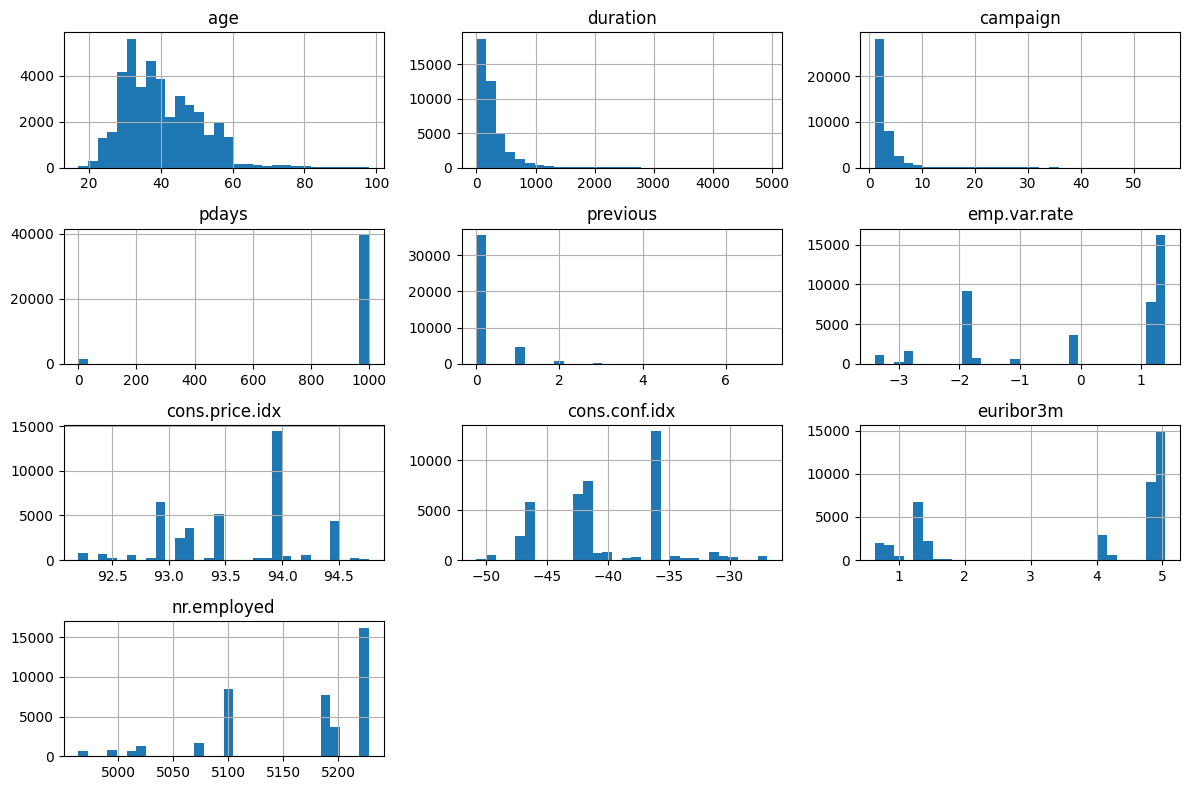

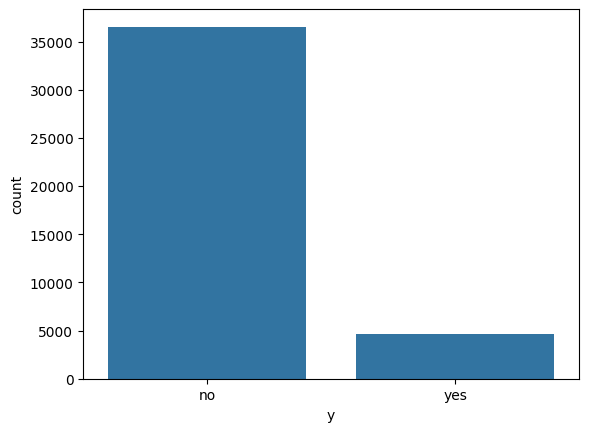

In [27]:
# Histogramas de variables numéricas
total_data[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

# Conteo de la variable objetivo
sns.countplot(x="y", data=total_data)
plt.show()

Podemos evidenciar que la cantidad de datos con valor no es muy grande en comparacion a los datos con valor Yes.

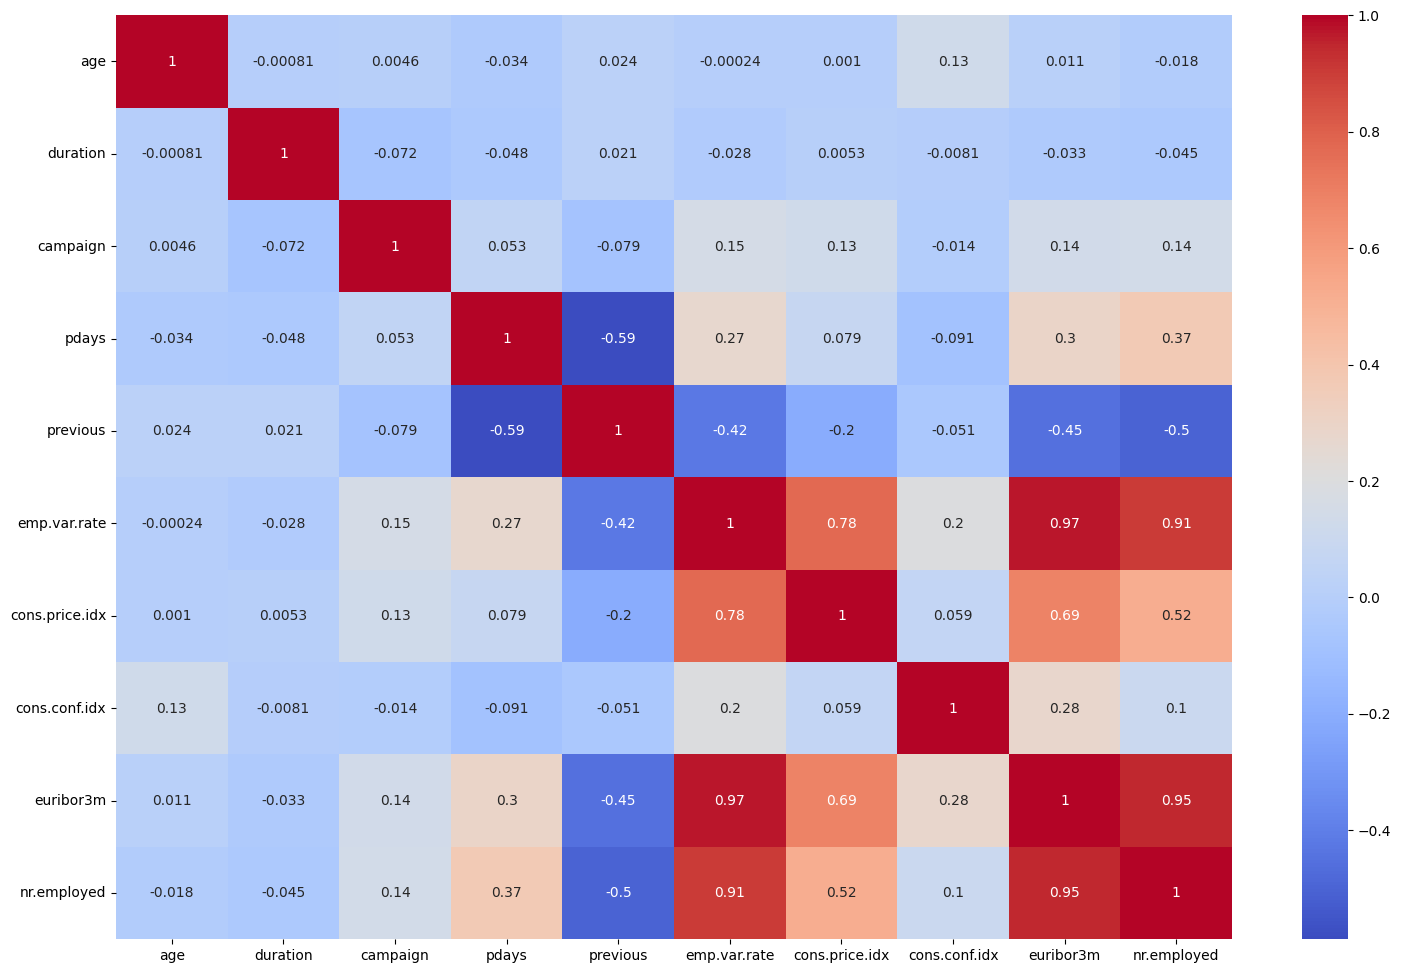

In [28]:
plt.figure(figsize=(18,12))
corr = total_data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

Podemos hacer aqui un analisis bastante interesante donde las Variables Pdays (Número de días que transcurrieron desde la última campaña hasta que fue contactado) y previous (Número de contactos realizados durante la campaña anterior al cliente), tiene una correlación con la cual puede que por esta misma muchos clientes se hallan declinado por el Yes.

Algunas variables económicas del dataset, como empleo, confianza del consumidor y EURIBOR, están muy relacionadas entre sí. Esto significa que nos dan información muy similar, por lo que no todas son necesarias para el análisis. Mantener solo las más relevantes ayuda a que nuestro modelo sea más simple y preciso.

___

Deteccion de Outliers
Aqui lo veremos con gráficos.

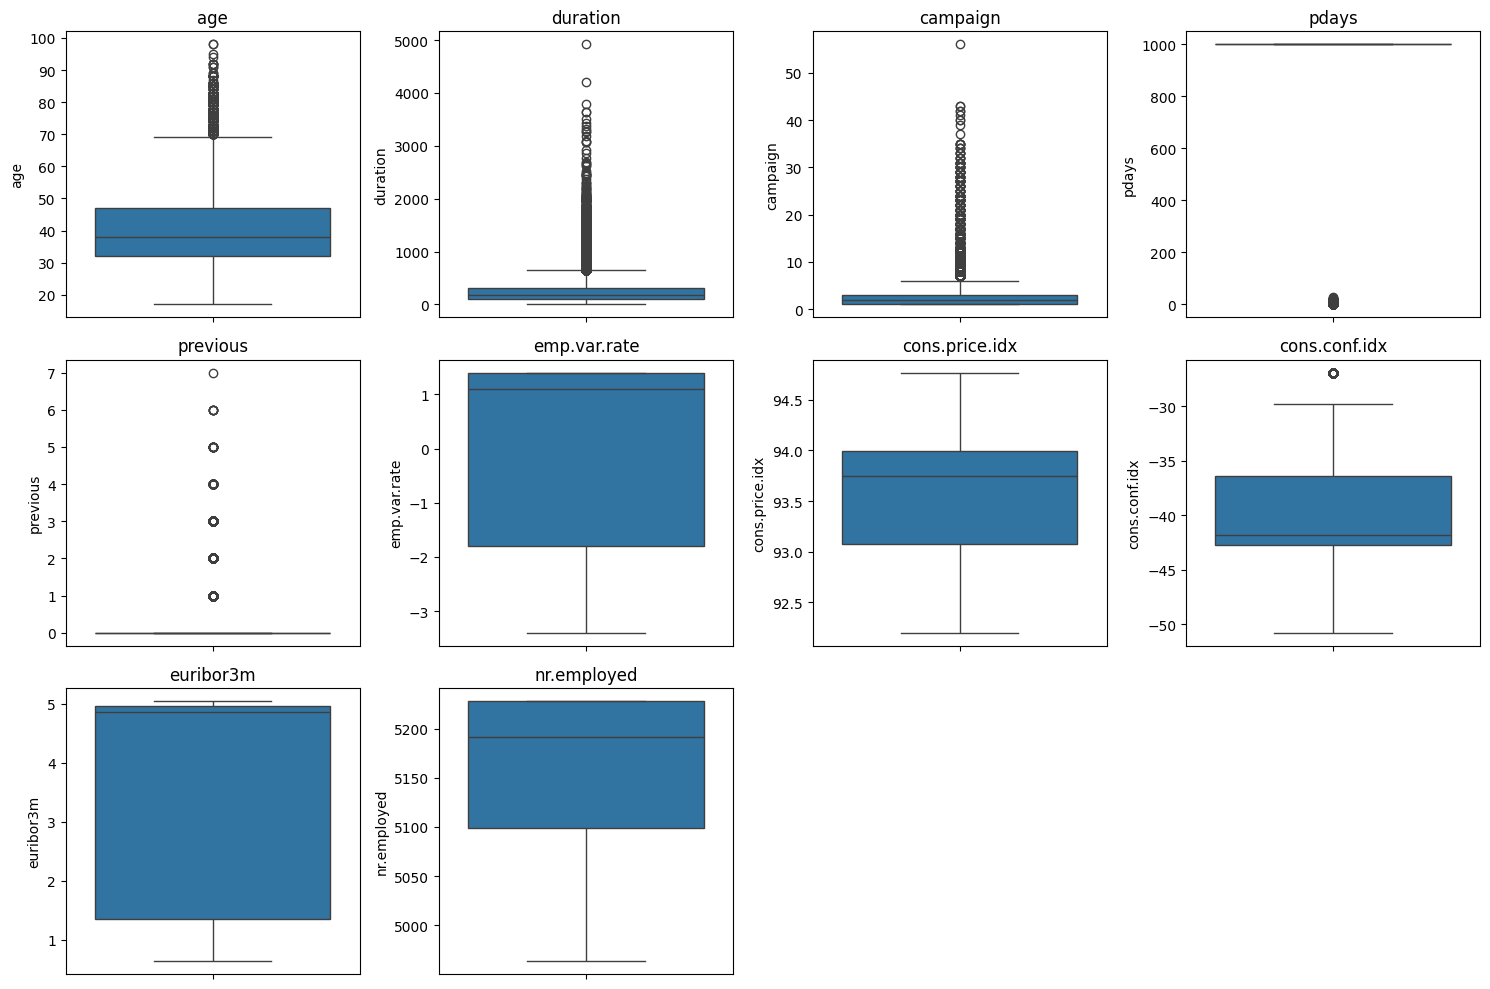

In [29]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)  # Ajustar filas/columnas según cantidad de variables
    sns.boxplot(y=total_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Aqui vemos los outliers por cada columna dentro del Dataset

In [30]:
num_cols = total_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Revisión de outliers por IQR
for col in num_cols:
    Q1 = total_data[col].quantile(0.25)
    Q3 = total_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers_count = ((total_data[col] < lower_limit) | (total_data[col] > upper_limit)).sum()
    print(f"{col}: {outliers_count} outliers")

age: 468 outliers
duration: 2963 outliers
campaign: 2406 outliers
pdays: 1515 outliers
previous: 5625 outliers
emp.var.rate: 0 outliers
cons.price.idx: 0 outliers
cons.conf.idx: 446 outliers
euribor3m: 0 outliers
nr.employed: 0 outliers


A continuacion lo que realizaremos es una limpieza de outliers no los vamos a eliminar simplemente vamos a reemplazar esos valores para que el analisis no se vea afectado no incluimos la columna Y ya que es la variable objetivo en nuestro Dataset.

In [31]:
# TENEMOS QUE GUARDARNOS TODOS LOS DATASETS, ESTO SIGNIFICA:

total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: (x if (x <= upper_limit) else upper_limit) if not pd.isna(x) else np.nan)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: (x if (x >= lower_limit) else lower_limit) if not pd.isna(x) else np.nan)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'duration': [0, np.float64(644.5)],
 'campaign': [1, np.float64(6.0)],
 'pdays': [np.float64(999.0), np.float64(999.0)],
 'previous': [np.float64(0.0), np.float64(0.0)],
 'emp.var.rate': [-3.4, np.float64(6.200000000000001)],
 'cons.price.idx': [np.float64(91.69650000000001), np.float64(95.3725)],
 'cons.conf.idx': [-50.8, np.float64(-26.949999999999992)],
 'euribor3m': [0.634, np.float64(10.3865)],
 'nr.employed': [np.float64(4905.6), np.float64(5421.6)]}

En esta parte tomamos los datos crudos y los afinamos para que el modelo tenga la mejor información posible para aprender y predecir.

In [32]:
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# 1️⃣ Variable objetivo
y = total_data_SIN_outliers["y"]  # Aquí usamos la columna 'y' que dice si el cliente contrató el producto
X = total_data_SIN_outliers.drop(columns=["y"])  # El resto de columnas como variables predictoras

# 2️⃣ Convertir variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

# 3️⃣ Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Seleccionar las 15 mejores variables
selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(X_train, y_train)

# 5️⃣ Columnas seleccionadas
selected_columns = X_train.columns[selector.get_support()]
print("Variables seleccionadas:", selected_columns.tolist())

# 6️⃣ DataFrames con solo las variables seleccionadas
X_train_sel = X_train[selected_columns]
X_test_sel = X_test[selected_columns]

Variables seleccionadas: ['duration', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'job_retired', 'job_student', 'default_unknown', 'contact_telephone', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_nonexistent', 'poutcome_success']


C:\Users\isaac\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [3 4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\isaac\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Equilibramos la variable objetivo para que el modelo no se sesgue hacia “No contrató”.
Entrenamos la regresión logística con estos datos balanceados.
Así, podemos identificar mejor a los clientes que sí podrían contratar el producto.

In [33]:
# 1️⃣ Instalar e importar SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 2️⃣ Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# 3️⃣ Aplicar SMOTE solo al conjunto de entrenamiento
X_train_res, y_train_res = smote.fit_resample(X_train_sel, y_train)

# Verificar el balance
print("Distribución original:\n", y_train.value_counts())
print("\nDistribución después de SMOTE:\n", y_train_res.value_counts())

# 4️⃣ Crear y entrenar el modelo de regresión logística
model_balanced = LogisticRegression(max_iter=1000, random_state=42)
model_balanced.fit(X_train_res, y_train_res)

# 5️⃣ Predecir sobre el conjunto de test
y_pred_bal = model_balanced.predict(X_test_sel)

# 6️⃣ Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_bal))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_bal))

Distribución original:
 y
no     29272
yes     3668
Name: count, dtype: int64

Distribución después de SMOTE:
 y
no     29272
yes    29272
Name: count, dtype: int64
Accuracy: 0.8563623118018455

Matriz de confusión:
 [[6240 1025]
 [ 158  813]]

Reporte de clasificación:
               precision    recall  f1-score   support

          no       0.98      0.86      0.91      7265
         yes       0.44      0.84      0.58       971

    accuracy                           0.86      8236
   macro avg       0.71      0.85      0.75      8236
weighted avg       0.91      0.86      0.87      8236



#Evaluación del modelo balanceado con SMOTE:

Entrenamos un modelo de regresión logística usando datos equilibrados para que pueda identificar tanto a los clientes que contratarán el producto como a los que no. La matriz de confusión y las métricas muestran que el modelo ahora predice de manera más justa y precisa, especialmente para la clase minoritaria, ayudándonos a tomar decisiones más efectivas de marketing.

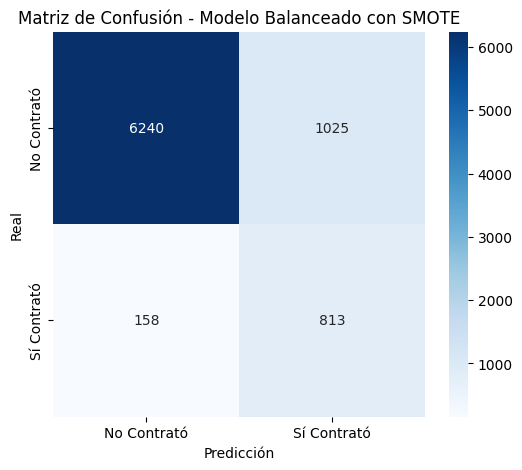

Exactitud (Accuracy): 0.8563623118018455

Reporte de Clasificación:
               precision    recall  f1-score   support

          no       0.98      0.86      0.91      7265
         yes       0.44      0.84      0.58       971

    accuracy                           0.86      8236
   macro avg       0.71      0.85      0.75      8236
weighted avg       0.91      0.86      0.87      8236



In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1️⃣ Predicciones del modelo entrenado con SMOTE
y_pred_bal = model_balanced.predict(X_test_sel)

# 2️⃣ Matriz de confusión
cm = confusion_matrix(y_test, y_pred_bal)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Contrató", "Sí Contrató"],
            yticklabels=["No Contrató", "Sí Contrató"])
plt.ylabel("Real")
plt.xlabel("Predicción")
plt.title("Matriz de Confusión - Modelo Balanceado con SMOTE")
plt.show()

# 3️⃣ Accuracy y reporte de clasificación
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_bal))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_bal))